<a href="https://colab.research.google.com/github/deepthimalugu/data-_science-_project/blob/main/predict_students__academic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


      Investigating and Forecasting Students' Academic Achievement through Machine Learning

Student Name: Malugu Sai Deepthi

Student ID: 23070109
Email: malugusaideepthi@gmail.com

Course: 2-Year Advanced Research (MSc Data Science)

Module: 7PAM2002 – Data Science Project

Semester: A 2025/2026
Supervisor: Vanadana Das


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt   # For plotting

In [ ]:
# Load both datasets
math = pd.read_csv('student-mat.csv', sep=';')
port = pd.read_csv('student-por.csv', sep=';')

print("Math dataset shape:", math.shape)
print("Portuguese dataset shape:", port.shape)

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


In [ ]:
common_cols = list(set(math.columns) & set(port.columns))
print("Common columns:", len(common_cols))

Common columns: 33


In [ ]:
merge_cols = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]


merged = pd.merge(math, port, on=merge_cols, suffixes=('_math', '_port'))

print("Merged dataset shape:", merged.shape)
merged.head()


Merged dataset shape: (382, 53)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
print("Shape:", merged.shape)
print("\nColumns:\n", merged.columns.tolist())

# Check for missing values
print("\nMissing values per column:\n", merged.isnull().sum())
print("\nTotal missing values:", merged.isnull().sum().sum())

# chech the  duplicates
print("Duplicates before:", merged.duplicated().sum())
merged = merged.drop_duplicates()
print("Duplicates after:", merged.duplicated().sum())

Shape: (382, 53)

Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian_math', 'traveltime_math', 'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math', 'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet', 'romantic_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'guardian_port', 'traveltime_port', 'studytime_port', 'failures_port', 'schoolsup_port', 'famsup_port', 'paid_port', 'activities_port', 'higher_port', 'romantic_port', 'famrel_port', 'freetime_port', 'goout_port', 'Dalc_port', 'Walc_port', 'health_port', 'absences_port', 'G1_port', 'G2_port', 'G3_port']

Missing values per column:
 school             0
sex                0
age                0
address            0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0


In [ ]:
grade_cols = ['G1_math','G2_math','G3_math','G1_port','G2_port','G3_port']
for col in grade_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

In [ ]:
num_cols = merged.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns:", list(num_cols))

for col in num_cols:
    print(f"{col}: min={merged[col].min()}, max={merged[col].max()}")


Numeric Columns: ['age', 'Medu', 'Fedu', 'traveltime_math', 'studytime_math', 'failures_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'traveltime_port', 'studytime_port', 'failures_port', 'famrel_port', 'freetime_port', 'goout_port', 'Dalc_port', 'Walc_port', 'health_port', 'absences_port', 'G1_port', 'G2_port', 'G3_port']
age: min=15, max=22
Medu: min=0, max=4
Fedu: min=0, max=4
traveltime_math: min=1, max=4
studytime_math: min=1, max=4
failures_math: min=0, max=3
famrel_math: min=1, max=5
freetime_math: min=1, max=5
goout_math: min=1, max=5
Dalc_math: min=1, max=5
Walc_math: min=1, max=5
health_math: min=1, max=5
absences_math: min=0, max=75
G1_math: min=3, max=19
G2_math: min=0, max=19
G3_math: min=0, max=20
traveltime_port: min=1, max=4
studytime_port: min=1, max=4
failures_port: min=0, max=3
famrel_port: min=1, max=5
freetime_port: min=1, max=5
goout_port: min=1, max=5
Dalc_port: min

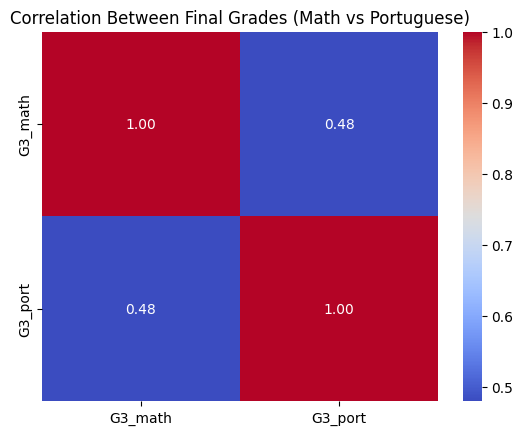

          G3_math   G3_port
G3_math  1.000000  0.480349
G3_port  0.480349  1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged[['G3_math','G3_port']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Final Grades (Math vs Portuguese)")
plt.show()

print(corr)


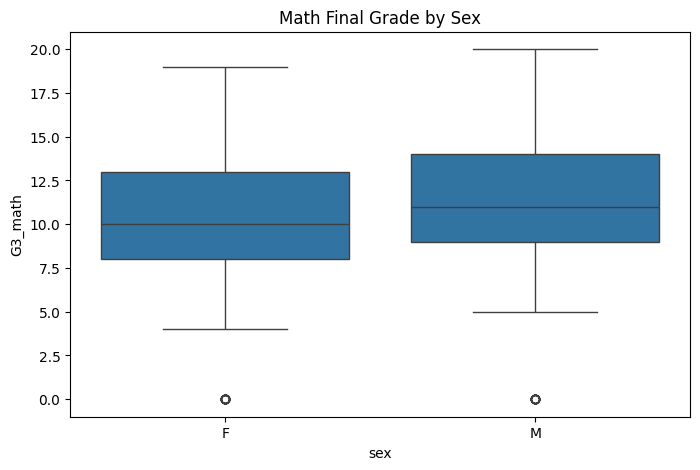

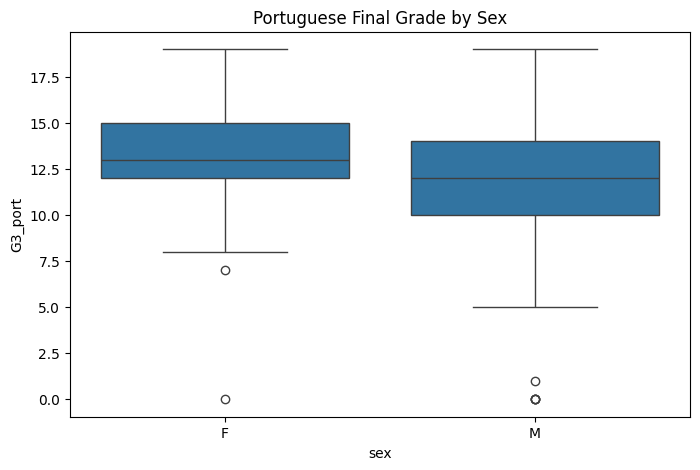

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="sex", y="G3_math")
plt.title("Math Final Grade by Sex")
plt.savefig("math_finalgrades_sex.png",dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="sex", y="G3_port")
plt.title("Portuguese Final Grade by Sex")
plt.savefig("port_finalgrades_sex.png",dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-2331781412.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2331781412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2331781412.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2331781412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


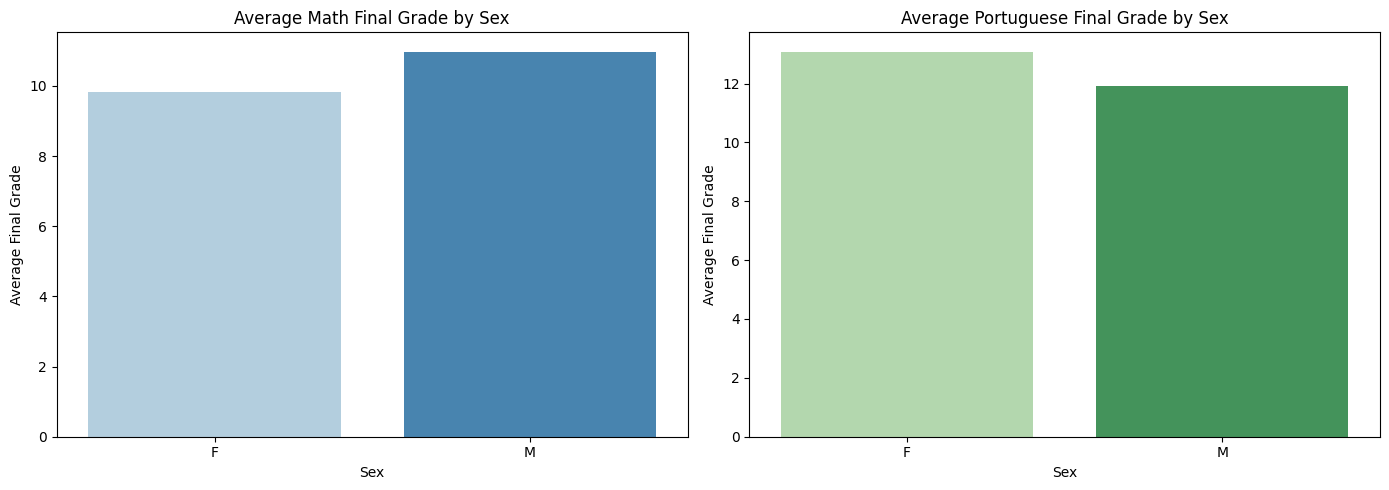

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Math Barplot ---
sns.barplot(
    data=merged,
    x="sex",
    y="G3_math",
    palette="Blues",
    ci=None,
    ax=axes[0]
)
axes[0].set_title("Average Math Final Grade by Sex")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Average Final Grade")

# --- Portuguese Barplot ---
sns.barplot(
    data=merged,
    x="sex",
    y="G3_port",
    palette="Greens",
    ci=None,
    ax=axes[1]
)
axes[1].set_title("Average Portuguese Final Grade by Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Average Final Grade")

plt.tight_layout()

# Save combined figure
plt.savefig("combined_sex_finalgrades.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


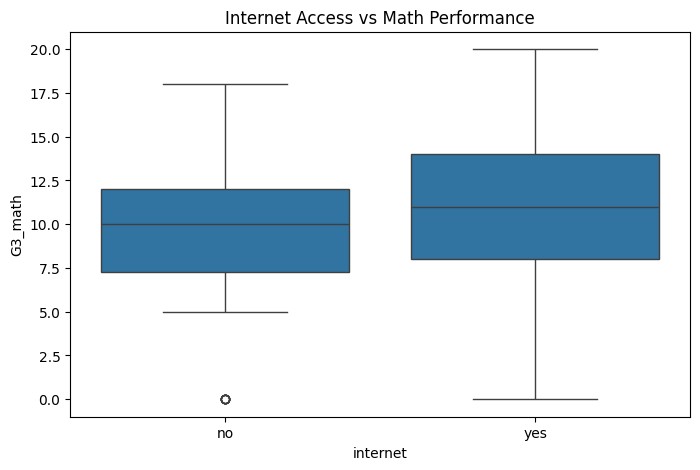

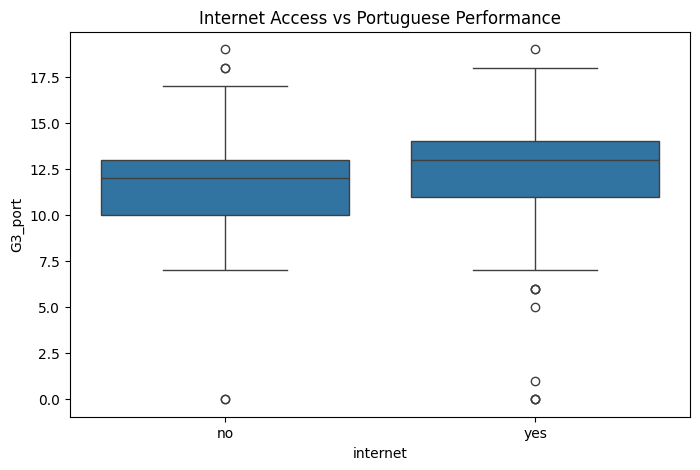

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="internet", y="G3_math")
plt.title("Internet Access vs Math Performance")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="internet", y="G3_port")
plt.title("Internet Access vs Portuguese Performance")
plt.show()


/tmp/ipython-input-2164935941.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


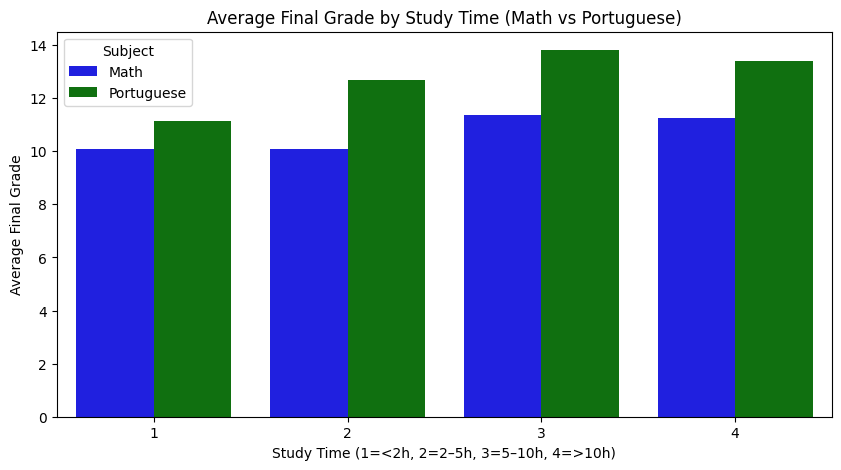

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare long-format data
long_df = pd.DataFrame({
    'studytime': list(merged['studytime_math']) + list(merged['studytime_port']),
    'G3': list(merged['G3_math']) + list(merged['G3_port']),
    'subject': ['Math'] * len(merged) + ['Portuguese'] * len(merged)
})

plt.figure(figsize=(10,5))
sns.barplot(
    data=long_df,
    x='studytime',
    y='G3',
    hue='subject',
    ci=None,
    palette=['blue', 'green']
)

plt.title("Average Final Grade by Study Time (Math vs Portuguese)")
plt.xlabel('Study Time (1=<2h, 2=2–5h, 3=5–10h, 4=>10h)')
plt.ylabel('Average Final Grade')
plt.legend(title='Subject')
plt.savefig("study_time.png",dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-3742192857.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


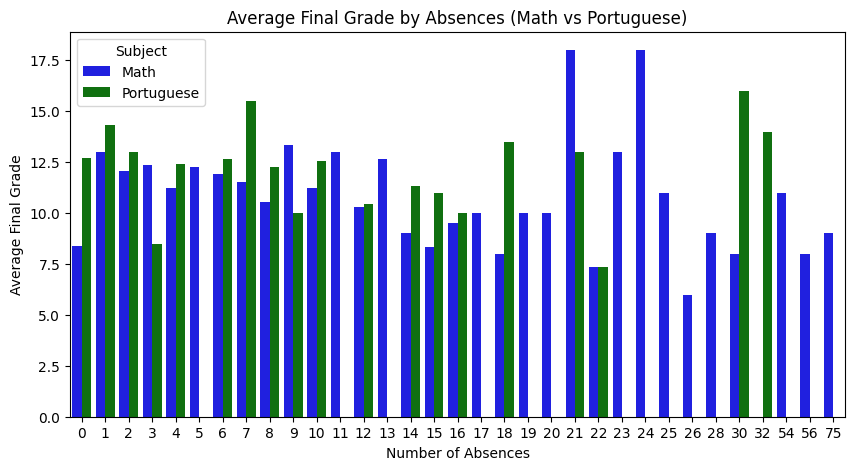

In [ ]:
long_abs = pd.DataFrame({
    'absences': list(merged['absences_math']) + list(merged['absences_port']),
    'G3': list(merged['G3_math']) + list(merged['G3_port']),
    'subject': ['Math'] * len(merged) + ['Portuguese'] * len(merged)
})

plt.figure(figsize=(10,5))
sns.barplot(
    data=long_abs,
    x='absences',
    y='G3',
    hue='subject',
    ci=None,
    palette=['blue', 'green']
)

plt.title("Average Final Grade by Absences (Math vs Portuguese)")
plt.xlabel("Number of Absences")
plt.ylabel("Average Final Grade")
plt.legend(title="Subject")
plt.show()

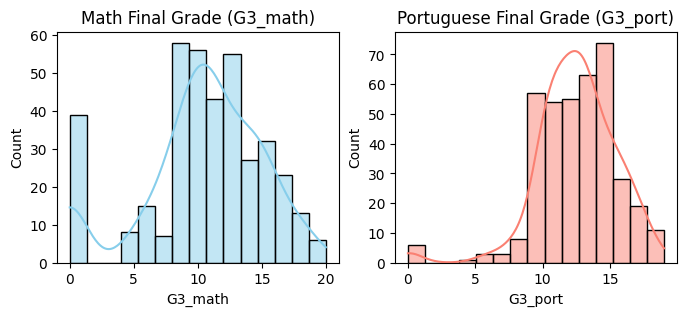

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))

sns.histplot(merged['G3_math'], bins=15, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Math Final Grade (G3_math)')

sns.histplot(merged['G3_port'], bins=15, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Portuguese Final Grade (G3_port)')
plt.savefig("finalgrades.png",dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-86410745.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-86410745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


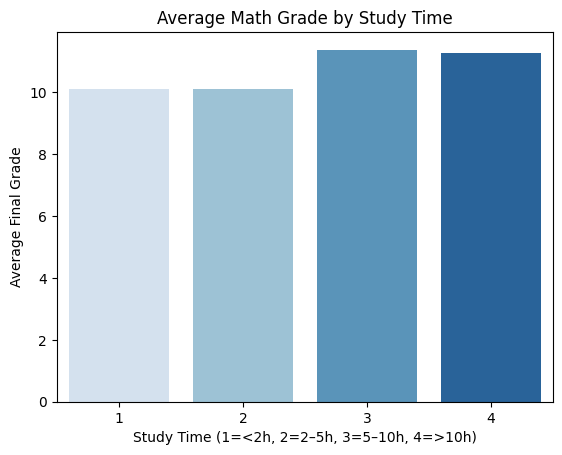

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x='studytime_math',
    y='G3_math',
    data=merged,
    ci=None,
    palette='Blues'
)

plt.title('Average Math Grade by Study Time')
plt.xlabel('Study Time (1=<2h, 2=2–5h, 3=5–10h, 4=>10h)')
plt.ylabel('Average Final Grade')
plt.show()


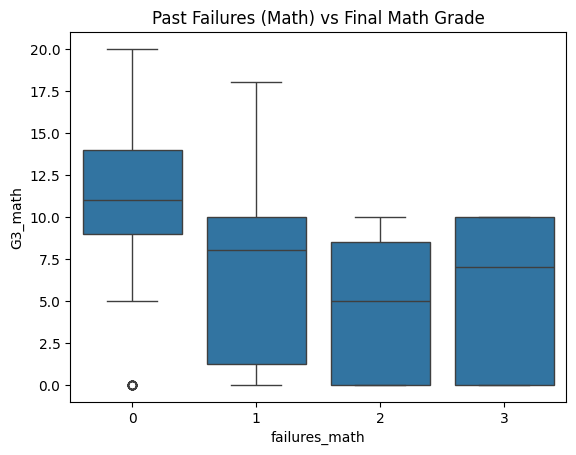

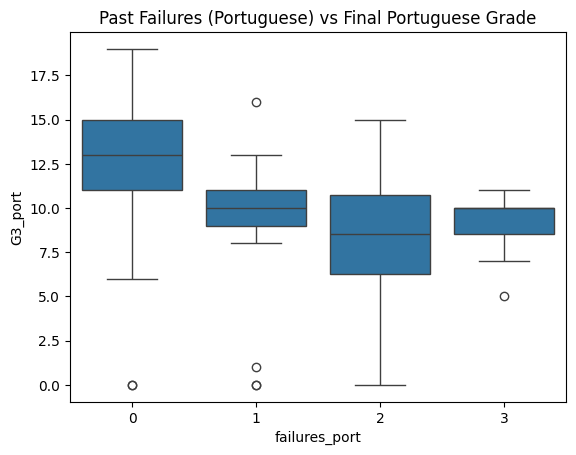

In [ ]:
sns.boxplot(x='failures_math', y='G3_math', data=merged)
plt.title('Past Failures (Math) vs Final Math Grade')
plt.show()

sns.boxplot(x='failures_port', y='G3_port', data=merged)
plt.title('Past Failures (Portuguese) vs Final Portuguese Grade')
plt.show()

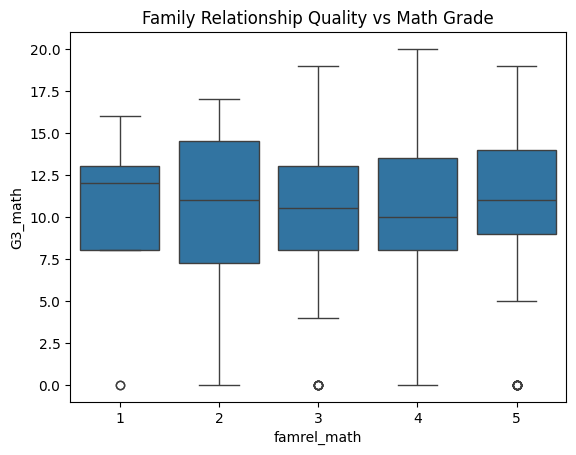

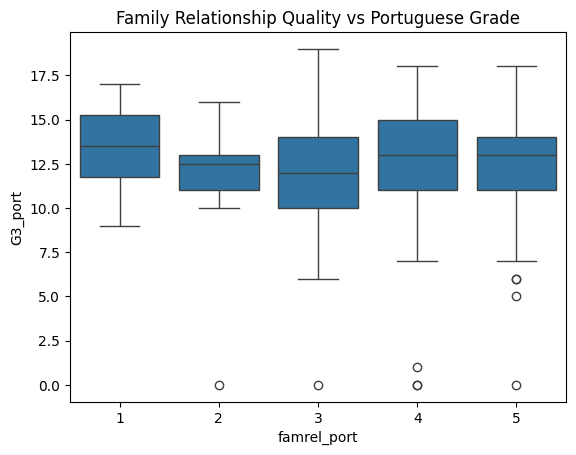

In [ ]:
sns.boxplot(data=merged, x="famrel_math", y="G3_math")
plt.title("Family Relationship Quality vs Math Grade")
plt.show()

sns.boxplot(data=merged, x="famrel_port", y="G3_port")
plt.title("Family Relationship Quality vs Portuguese Grade")
plt.show()


/tmp/ipython-input-1656619895.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x="famrel_math", y="G3_math", ci=None)


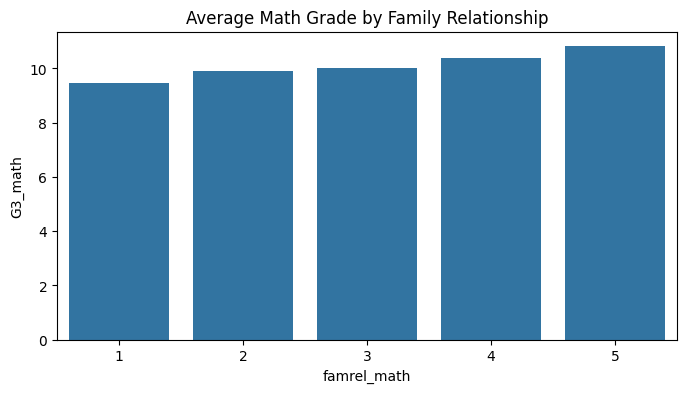

/tmp/ipython-input-1656619895.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x="famrel_port", y="G3_port", ci=None)


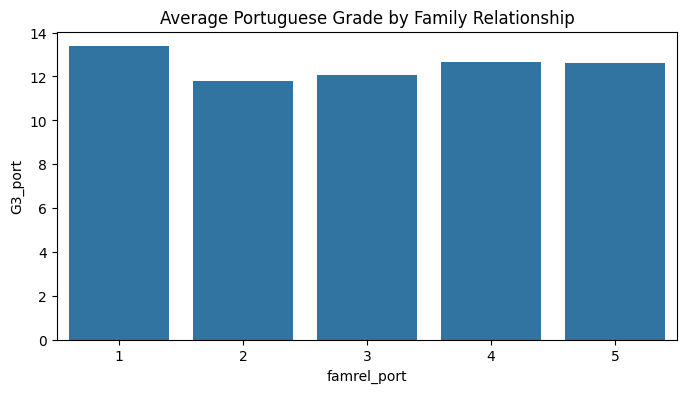

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=merged, x="famrel_math", y="G3_math", ci=None)
plt.title("Average Math Grade by Family Relationship")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=merged, x="famrel_port", y="G3_port", ci=None)
plt.title("Average Portuguese Grade by Family Relationship")
plt.show()


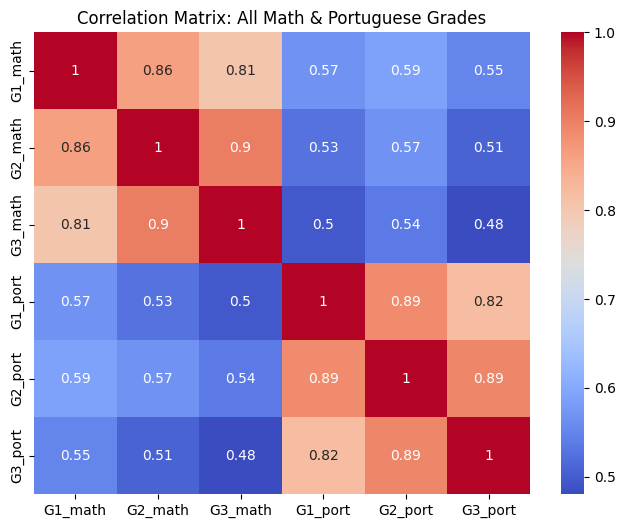

In [ ]:
grade_corr = merged[grade_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(grade_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: All Math & Portuguese Grades')
plt.savefig("correlation_finalgrades.png",dpi=300, bbox_inches='tight')

plt.show()


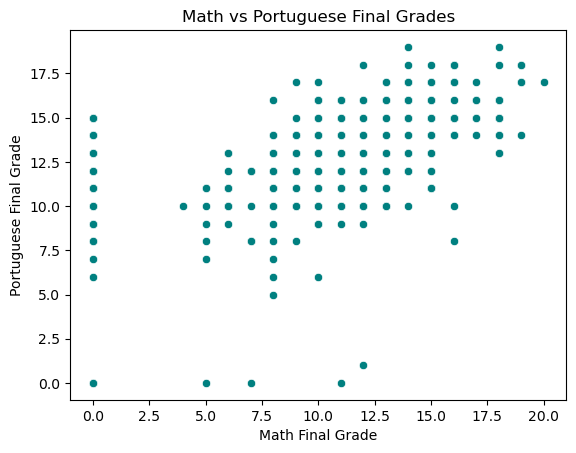

In [ ]:
sns.scatterplot(x='G3_math', y='G3_port', data=merged, color='teal')
plt.title('Math vs Portuguese Final Grades')
plt.xlabel('Math Final Grade')
plt.ylabel('Portuguese Final Grade')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

df = merged.copy()

# Detect target final grade
df['final_grade'] = (df['G3_math'] + df['G3_port']) / 2

# Drop original final grade columns (targets should not be in X)
X_raw = df.drop(columns=['G3_math', 'G3_port', 'final_grade'])
y = df['final_grade']


In [ ]:
for col in X_raw.columns:
    X_raw[col] = pd.to_numeric(X_raw[col], errors='ignore')


C:\Users\deept\AppData\Local\Temp\ipykernel_24596\168176511.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_raw[col] = pd.to_numeric(X_raw[col], errors='ignore')


In [ ]:
X = pd.get_dummies(X_raw, drop_first=True)
print("Shape after encoding:", X.shape)


Shape after encoding: (382, 61)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest (Basic Model)")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Random Forest (Basic Model)
MAE : 0.7671753246753248
RMSE: 1.1432859128719415
R²  : 0.8866986581688596


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1. Base model
rf_base = RandomForestRegressor(random_state=42)

# 2. Hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.3, 0.5, 0.7]  # avoid 'auto' deprecation
}

# 3. Randomized Search
rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30,                        # number of random combinations to try
    scoring='neg_mean_squared_error', # minimise MSE
    cv=3,                             # 3-fold cross validation
    random_state=42,
    n_jobs=-1,                        # use all cores
    verbose=1
)

rf_search.fit(X_train, y_train)

# 4. Best model and its params
best_rf = rf_search.best_estimator_
print("Best Random Forest parameters:")
print(rf_search.best_params_)

# 5. Evaluate tuned model on test set
y_pred_tuned = best_rf.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nRandom Forest (TUNED) Results:")
print("MAE :", mae_tuned)
print("RMSE:", rmse_tuned)
print("R²  :", r2_tuned)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Random Forest parameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7, 'max_depth': 30}

Random Forest (TUNED) Results:
MAE : 0.747243896525553
RMSE: 1.1578100413233257
R²  : 0.8838016470728407


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gbr_basic = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr_basic.fit(X_train, y_train)
gbr_pred_basic = gbr_basic.predict(X_test)

gbr_basic_mae  = mean_absolute_error(y_test, gbr_pred_basic)
gbr_basic_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred_basic))
gbr_basic_r2   = r2_score(y_test, gbr_pred_basic)

print("Gradient Boosting (Basic)")
print("MAE :", gbr_basic_mae)
print("RMSE:", gbr_basic_rmse)
print("R²  :", gbr_basic_r2)


Gradient Boosting (Basic)
MAE : 0.7374638958835782
RMSE: 1.0142021202990088
R²  : 0.9108391136971362


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gbr_base = GradientBoostingRegressor(random_state=42)

gbr_param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbr_search = RandomizedSearchCV(
    estimator=gbr_base,
    param_distributions=gbr_param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

gbr_search.fit(X_train, y_train)

best_gbr = gbr_search.best_estimator_
print("Best Gradient Boosting parameters:")
print(gbr_search.best_params_)

gbr_pred_tuned = best_gbr.predict(X_test)

gbr_tuned_mae  = mean_absolute_error(y_test, gbr_pred_tuned)
gbr_tuned_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred_tuned))
gbr_tuned_r2   = r2_score(y_test, gbr_pred_tuned)

print("\nGradient Boosting (TUNED)")
print("MAE :", gbr_tuned_mae)
print("RMSE:", gbr_tuned_rmse)
print("R²  :", gbr_tuned_r2)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Gradient Boosting parameters:
{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 2, 'learning_rate': 0.05}

Gradient Boosting (TUNED)
MAE : 0.7043560222653047
RMSE: 0.9519125872831853
R²  : 0.9214548293095438


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print("-" * len(name))
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R²  :", r2)

    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Basic SVR model
svr_basic = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel='rbf'))   # RBF kernel is most common
])

svr_basic.fit(X_train, y_train)

svr_basic_results = evaluate_model("SVR (basic)", svr_basic, X_test, y_test)



SVR (basic)
-----------
MAE : 1.2723389543605739
RMSE: 1.9881662921700771
R²  : 0.6573657593223676


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

svr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

svr_param_dist = {
    "svr__kernel": ["rbf", "poly", "sigmoid"],
    "svr__C": [0.1, 1, 10, 50, 100],
    "svr__gamma": ["scale", "auto", 0.01, 0.001],
    "svr__epsilon": [0.01, 0.05, 0.1, 0.2]
}

svr_search = RandomizedSearchCV(
    estimator=svr_pipeline,
    param_distributions=svr_param_dist,
    n_iter=20,
    scoring="neg_mean_squared_error",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

svr_search.fit(X_train, y_train)

best_svr = svr_search.best_estimator_
print("\nBest SVR parameters:")
print(svr_search.best_params_)

svr_tuned_results = evaluate_model("SVR (tuned)", best_svr, X_test, y_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best SVR parameters:
{'svr__kernel': 'sigmoid', 'svr__gamma': 'scale', 'svr__epsilon': 0.2, 'svr__C': 1}

SVR (tuned)
-----------
MAE : 0.9641314888913715
RMSE: 1.5237162191856541
R²  : 0.7987510934155369


In [ ]:
import pandas as pd

results = pd.DataFrame([
    {"Model": "Random Forest (basic)",     "MAE": 0.7672, "RMSE": 1.1433, "R2": 0.8867},
    {"Model": "Random Forest (tuned)",     "MAE": 0.7472, "RMSE": 1.1578, "R2": 0.8838},
    {"Model": "Gradient Boosting (basic)", "MAE": 0.7375, "RMSE": 1.0142, "R2": 0.9108},
    {"Model": "Gradient Boosting (tuned)", "MAE": 0.7044, "RMSE": 0.9519, "R2": 0.9215},
    {"Model": "SVR (basic)",               "MAE": 1.2723, "RMSE": 1.9882, "R2": 0.6574},
    {"Model": "SVR (tuned)",               "MAE": 0.9641, "RMSE": 1.5237, "R2": 0.7988},
])

results.sort_values(by="RMSE")


,Model,MAE,RMSE,R2
3,Gradient Boosting (tuned),0.7044,0.9519,0.9215
2,Gradient Boosting (basic),0.7375,1.0142,0.9108
0,Random Forest (basic),0.7672,1.1433,0.8867
1,Random Forest (tuned),0.7472,1.1578,0.8838
5,SVR (tuned),0.9641,1.5237,0.7988
4,SVR (basic),1.2723,1.9882,0.6574
